In [2]:
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio 
from nilearn import plotting
from scipy.ndimage import center_of_mass
import utils.utils_visualization as vis_utils

In [3]:
def read_all_niftis_raw(sub):
    mask = nib.load(f"/datadrive_m2/jorge/data/VALDO_new/sub-{sub}/sub-{sub}_space-T2S_CMB.nii.gz")
    t2s = nib.load(f"/datadrive_m2/jorge/data/VALDO_new/sub-{sub}/sub-{sub}_space-T2S_desc-masked_T2S.nii.gz")
    t2 = nib.load(f"/datadrive_m2/jorge/data/VALDO_new/sub-{sub}/sub-{sub}_space-T2S_desc-masked_T2.nii.gz")
    t1 = nib.load(f"/datadrive_m2/jorge/data/VALDO_new/sub-{sub}/sub-{sub}_space-T2S_desc-masked_T1.nii.gz")

    return mask, t2s, t2, t1

In [4]:
sub = 301
mask, t2s, t2, t1 = read_all_niftis_raw(sub)

In [5]:
print(t2.get_fdata()[0, 0, 20])
print(np.isnan(t2.get_fdata()[0, 0, 20]))

nan
True


In [6]:
print(np.sum(t2.get_fdata() == float('nan') ))

0


(array([1.591102e+06, 1.403880e+05, 3.143190e+05, 1.482260e+05,
       5.712600e+04, 2.980200e+04, 1.517200e+04, 5.813000e+03,
       2.191000e+03, 2.080000e+02]), array([-26.19852638,  33.89734554,  93.99321747, 154.08908939,
       214.18496132, 274.28083324, 334.37670517, 394.4725771 ,
       454.56844902, 514.66432095, 574.76019287]), <BarContainer object of 10 artists>)


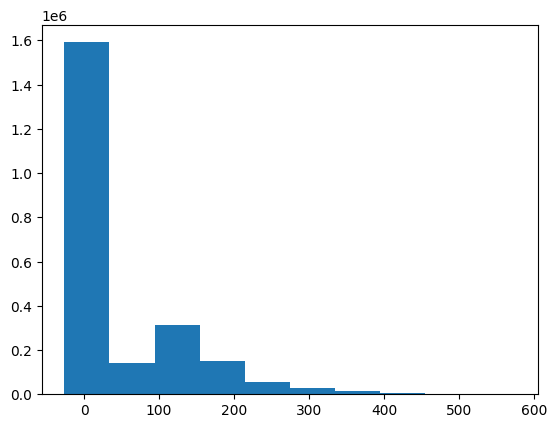

In [7]:
print(plt.hist(t2.get_fdata().flatten()))

(array([1.968495e+06, 7.122200e+04, 1.947590e+05, 2.472330e+05,
       5.262300e+04, 1.949200e+04, 2.007000e+03, 5.700000e+01,
       1.200000e+01, 4.000000e+00]), array([  0. ,  29.3,  58.6,  87.9, 117.2, 146.5, 175.8, 205.1, 234.4,
       263.7, 293. ]), <BarContainer object of 10 artists>)


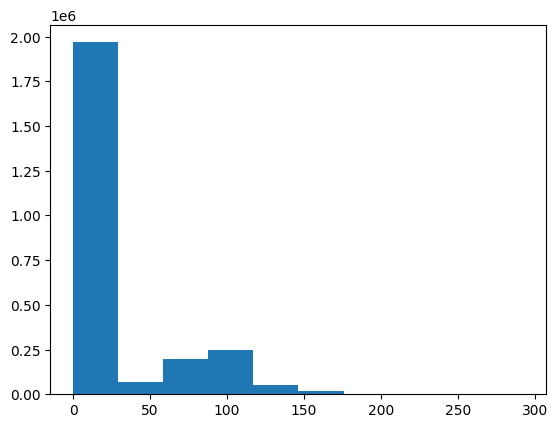

In [8]:
print(plt.hist(t2s.get_fdata().flatten()))

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
/datadrive_m2/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


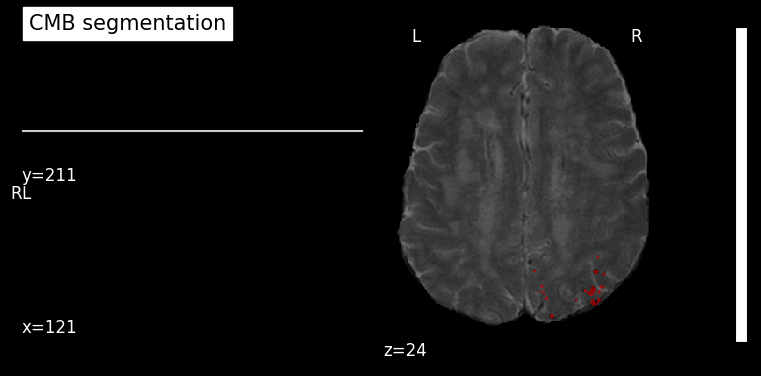

[121.48171793383634, 211.00928612884505, 24.698200812536275]

In [9]:
sub = 110
mask, t2s, t2, t1 = read_all_niftis_raw(sub)

vis_utils.visualize_CMB_overlayed(t2s, mask)

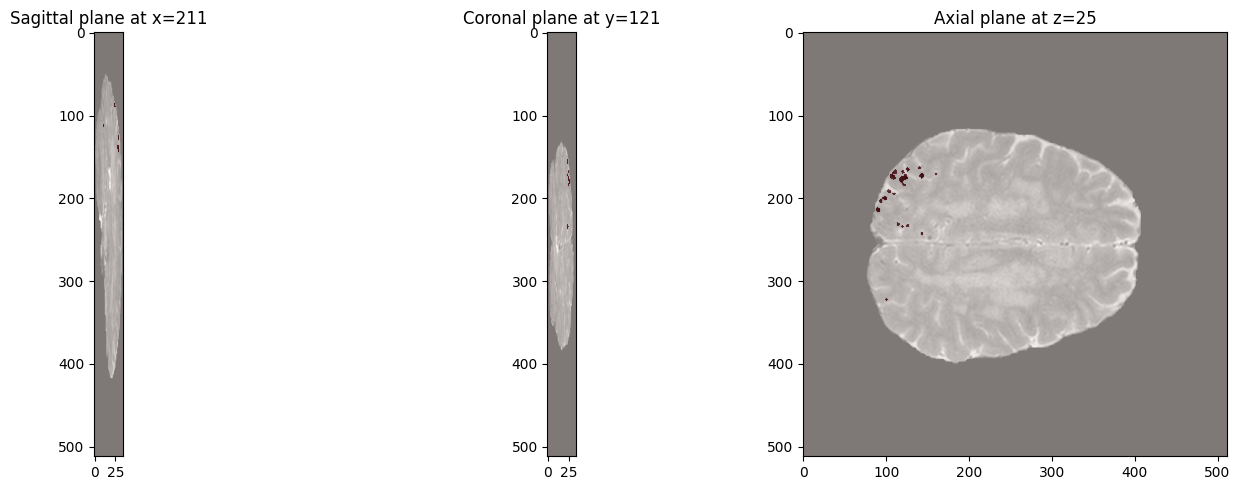

In [10]:
# more basic plot
vis_utils.plot_mask_on_image(t2s, mask)